# Dijkstra


Given a weighted graph and a source vertex in the graph, find the shortest paths from the source to all the other vertices in the given graph.

**Note: The given graph does not contain any negative edge.**


Input: src = 0, the graph is shown below.


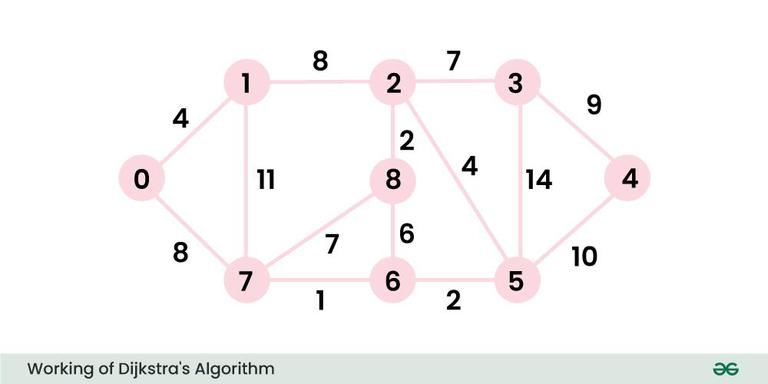




Output: 0 4 12 19 21 11 9 8 14 <br> <br>
Explanation: The distance from 0 to 1 = 4. <br> <br>
The minimum distance from 0 to 2 = 12. 0->1->2 <br> <br>
The minimum distance from 0 to 3 = 19. 0->1->2->3 <br> <br>
The minimum distance from 0 to 4 = 21. 0->7->6->5->4 <br> <br>
The minimum distance from 0 to 5 = 11. 0->7->6->5 <br> <br>
The minimum distance from 0 to 6 = 9. 0->7->6 <br> <br>
The minimum distance from 0 to 7 = 8. 0->7 <br> <br>
The minimum distance from 0 to 8 = 14. 0->1->2->8 <br> <br>


## Dijkstra’s Algorithm using Adjacency List in O(E logV):

For Dijkstra’s algorithm, it is always recommended to use Heap (or priority queue) as the required operations (extract minimum and decrease key) match with the speciality of the heap (or priority queue). However, the problem is, that priority_queue doesn’t support the decrease key. To resolve this problem, do not update a key, but insert one more copy of it. So we allow multiple instances of the same vertex in the priority queue. This approach doesn’t require decreasing key operations and has below important properties.

Whenever the distance of a vertex is reduced, we add one more instance of a vertex in priority_queue. Even if there are multiple instances, we only consider the instance with minimum distance and ignore other instances.

The time complexity remains O(E * LogV) as there will be at most O(E) vertices in the priority queue and O(logE) is the same as O(logV)

In [18]:
import heapq

# iPair ==> Integer Pair
iPair = tuple

# This class represents a directed graph using
# adjacency list representation
class Graph:
	def __init__(self, V: int): # Constructor
		self.V = V
		self.adj = [[] for _ in range(V)]

	def addEdge(self, u: int, v: int, w: int):
		self.adj[u].append((v, w))
		self.adj[v].append((u, w))

	# Prints shortest paths from src to all other vertices
	def shortestPath(self, src: int):
		# Create a priority queue to store vertices that
		# are being preprocessed
		pq = []
		heapq.heappush(pq, (0, src))

		# Create a vector for distances and initialize all
		# distances as infinite (INF)
		dist = [float('inf')] * self.V
		dist[src] = 0

		while pq:
			# The first vertex in pair is the minimum distance
			# vertex, extract it from priority queue.
			# vertex label is stored in second of pair
			d, u = heapq.heappop(pq)

			# 'i' is used to get all adjacent vertices of a
			# vertex
			for v, weight in self.adj[u]:
				# If there is shorted path to v through u.
				if dist[v] > dist[u] + weight:
					# Updating distance of v
					dist[v] = dist[u] + weight
					heapq.heappush(pq, (dist[v], v))

		# Print shortest distances stored in dist[]
		for i in range(self.V):
			print(f"{i} \t\t {dist[i]}")

# Driver's code
if __name__ == "__main__":
	# create the graph given in above figure
	V = 9
	g = Graph(V)

	# making above shown graph
	g.addEdge(0, 1, 4)
	g.addEdge(0, 7, 8)
	g.addEdge(1, 2, 8)
	g.addEdge(1, 7, 11)
	g.addEdge(2, 3, 7)
	g.addEdge(2, 8, 2)
	g.addEdge(2, 5, 4)
	g.addEdge(3, 4, 9)
	g.addEdge(3, 5, 14)
	g.addEdge(4, 5, 10)
	g.addEdge(5, 6, 2)
	g.addEdge(6, 7, 1)
	g.addEdge(6, 8, 6)
	g.addEdge(7, 8, 7)

	g.shortestPath(0)

0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


Time Complexity: O(E * logV), Where E is the number of edges and V is the number of vertices.
Auxiliary Space: O(V)

### Video of steps for another example

In [19]:
from IPython.display import Video

Video("Dijkstra.mp4")

### Animated steps for another Example

![Dijsktra gif url](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)

### Applications of Dijkstra’s Algorithm:

Google maps uses Dijkstra algorithm to show shortest distance between source and destination.

In computer networking, Dijkstra’s algorithm forms the basis for various routing protocols, such as OSPF (Open Shortest Path First) and IS-IS (Intermediate System to Intermediate System).

Transportation and traffic management systems use Dijkstra’s algorithm to optimize traffic flow, minimize congestion, and plan the most efficient routes for vehicles.

Airlines use Dijkstra’s algorithm to plan flight paths that minimize fuel consumption, reduce travel time.

Dijkstra’s algorithm is applied in electronic design automation for routing connections on integrated circuits and very-large-scale integration (VLSI) chips.

# Bellman-ford

Imagine you have a map with different cities connected by roads, each road having a certain distance. The Bellman–Ford algorithm is like a guide that helps you find the shortest path from one city to all other cities, even if some roads have negative lengths. It’s like a GPS for computers, useful for figuring out the quickest way to get from one point to another in a network. In this article, we’ll take a closer look at how this algorithm works and why it’s so handy in solving everyday problems.

Bellman-Ford is a single source shortest path algorithm that determines the shortest path between a given source vertex and every other vertex in a graph. This algorithm can be used on both weighted and unweighted graphs.

A Bellman-Ford algorithm is also guaranteed to find the shortest path in a graph, similar to Dijkstra’s algorithm. Although Bellman-Ford is slower than Dijkstra’s algorithm, it is capable of handling graphs with negative edge weights, which makes it more versatile. The shortest path cannot be found if there exists a negative cycle in the graph. If we continue to go around the negative cycle an infinite number of times, then the cost of the path will continue to decrease (even though the length of the path is increasing). As a result, Bellman-Ford is also capable of detecting negative cycles, which is an important feature.



### The idea behind Bellman Ford Algorithm:
The Bellman-Ford algorithm’s primary principle is that it starts with a single source and calculates the distance to each node. The distance is initially unknown and assumed to be infinite, but as time goes on, the algorithm relaxes those paths by identifying a few shorter paths. Hence it is said that Bellman-Ford is based on “Principle of Relaxation“.

###  Principle of Relaxation of Edges for Bellman-Ford:
* It states that for the graph having N vertices, all the edges should be relaxed N-1 times to compute the single source shortest path.

* In order to detect whether a negative cycle exists or not, relax all the edge one more time and if the shortest distance for any node reduces then we can say that a negative cycle exists. In short if we relax the edges N times, and there is any change in the shortest distance of any node between the N-1th and Nth relaxation than a negative cycle exists, otherwise not exist.

### Why Relaxing Edges N-1 times, gives us Single Source Shortest Path?
In the worst-case scenario, a shortest path between two vertices can have at most N-1 edges, where N is the number of vertices. This is because a simple path in a graph with N vertices can have at most N-1 edges, as it’s impossible to form a closed loop without revisiting a vertex.

By relaxing edges N-1 times, the Bellman-Ford algorithm ensures that the distance estimates for all vertices have been updated to their optimal values, assuming the graph doesn’t contain any negative-weight cycles reachable from the source vertex. If a graph contains a negative-weight cycle reachable from the source vertex, the algorithm can detect it after N-1 iterations, since the negative cycle disrupts the shortest path lengths.

In summary, relaxing edges N-1 times in the Bellman-Ford algorithm guarantees that the algorithm has explored all possible paths of length up to N-1, which is the maximum possible length of a shortest path in a graph with N vertices. This allows the algorithm to correctly calculate the shortest paths from the source vertex to all other vertices, given that there are no negative-weight cycles.

### Why Does the Reduction of Distance in the N’th Relaxation Indicates the Existence of a Negative Cycle?
As previously discussed, achieving the single source shortest paths to all other nodes takes N-1 relaxations. If the N’th relaxation further reduces the shortest distance for any node, it implies that a certain edge with negative weight has been traversed once more. It is important to note that during the N-1 relaxations, we presumed that each vertex is traversed only once. However, the reduction of distance during the N’th relaxation indicates revisiting a vertex.

## Algorithm to Find Negative Cycle in a Directed Weighted Graph Using Bellman-Ford:

* Initialize distance array dist[] for each vertex ‘v‘ as dist[v] = INFINITY.

* Assume any vertex (let’s say ‘0’) as source and assign dist = 0.

* Relax all the edges(u,v,weight) N-1 times as per the below condition:

  * dist[v] = minimum(dist[v], distance[u] + weight)

* Now, Relax all the edges one more time i.e. the Nth time and based on the below two cases we can detect the negative cycle:

  * Case 1 (Negative cycle exists): For any edge(u, v, weight), if dist[u] + weight < dist[v]

  * Case 2 (No Negative cycle) : case 1 fails for all the edges.



### Handling Disconnected Graphs in the Algorithm:
The above algorithm and program might not work if the given graph is disconnected. It works when all vertices are reachable from source vertex 0.

To handle disconnected graphs, we can repeat the above algorithm for vertices having distance = INFINITY, or simply for the vertices that are not visited.

In [20]:
# Python3 program for Bellman-Ford's single source
# shortest path algorithm.

# Class to represent a graph

class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = []

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	# utility function used to print the solution
	def printArr(self, dist):
		print("Vertex Distance from Source")
		for i in range(self.V):
			print("{0}\t\t{1}".format(i, dist[i]))

	# The main function that finds shortest distances from src to
	# all other vertices using Bellman-Ford algorithm. The function
	# also detects negative weight cycle
	def BellmanFord(self, src):

		# Step 1: Initialize distances from src to all other vertices
		# as INFINITE
		dist = [float("Inf")] * self.V
		dist[src] = 0

		# Step 2: Relax all edges |V| - 1 times. A simple shortest
		# path from src to any other vertex can have at-most |V| - 1
		# edges
		for _ in range(self.V - 1):
			# Update dist value and parent index of the adjacent vertices of
			# the picked vertex. Consider only those vertices which are still in
			# queue
			for u, v, w in self.graph:
				if dist[u] != float("Inf") and dist[u] + w < dist[v]:
					dist[v] = dist[u] + w

		# Step 3: check for negative-weight cycles. The above step
		# guarantees shortest distances if graph doesn't contain
		# negative weight cycle. If we get a shorter path, then there
		# is a cycle.

		for u, v, w in self.graph:
			if dist[u] != float("Inf") and dist[u] + w < dist[v]:
				print("Graph contains negative weight cycle")
				return

		# print all distance
		self.printArr(dist)


# Driver's code
if __name__ == '__main__':
	g = Graph(5)
	g.addEdge(0, 1, -1)
	g.addEdge(0, 2, 4)
	g.addEdge(1, 2, 3)
	g.addEdge(1, 3, 2)
	g.addEdge(1, 4, 2)
	g.addEdge(3, 2, 5)
	g.addEdge(3, 1, 1)
	g.addEdge(4, 3, -3)

	# function call
	g.BellmanFord(0)

# Initially, Contributed by Neelam Yadav
# Later On, Edited by Himanshu Garg


Vertex Distance from Source
0		0
1		-1
2		2
3		-2
4		1


### Video of steps for another example



In [21]:
from IPython.display import Video

Video("bellman-ford.mp4")

### animated steps for another example

![bellman-ford gif](https://upload.wikimedia.org/wikipedia/commons/7/77/Bellman%E2%80%93Ford_algorithm_example.gif)

### Complexity Analysis:

Time Complexity when graph is connected:

Best Case: O(E), when distance array after 1st and 2nd relaxation are same , we can simply stop further processing

Average Case: O(V*E)

Worst Case: O(V*E)

Time Complexity when graph is disconnected:

All the cases: O(E*(V^2))

Auxiliary Space: O(V), where V is the number of vertices in the graph.

### Bellman Ford’s Algorithm Applications:
Network Routing: Bellman-Ford is used in computer networking to find the shortest paths in routing tables, helping data packets navigate efficiently across networks.

GPS Navigation: GPS devices use Bellman-Ford to calculate the shortest or fastest routes between locations, aiding navigation apps and devices.

Transportation and Logistics: Bellman-Ford’s algorithm can be applied to determine the optimal paths for vehicles in transportation and logistics, minimizing fuel consumption and travel time.

Game Development: Bellman-Ford can be used to model movement and navigation within virtual worlds in game development, where different paths may have varying costs or obstacles.

Robotics and Autonomous Vehicles: The algorithm aids in path planning for robots or autonomous vehicles, considering obstacles, terrain, and energy consumption.

### Drawback of Bellman Ford’s Algorithm:
Bellman-Ford algorithm will fail if the graph contains any negative edge cycle.

# difference constraint system 

Linear programming

In the general linear-programming problem, we are given an m × n matrix A, an m-vector b, and an n-vector c. We wish to find a vector x of n elements that maximizes the objective function $\sum_{i=1}^{n}c_i x_i$
subject to the m constraints given by $Ax \leq b$.

Although the simplex algorithm, does not always run in time polynomial in the size of its input, there are other linear-programming algorithms that do run in polynomial time. There are several reasons that it is important to understand the setup of linear-programming problems. First, knowing that a given problem can be cast as a polynomial-sized linear-programming problem immediately means that there is a polynomial-time algorithm for the problem. Second, there are many special cases of linear programming for which faster algorithms exist. For example, as shown in this section, the single-source shortest-paths problem is a special case of linear programming. Other problems that can be cast as linear programming include the single-pair shortest-path problem and the maximum-flow problem.

Sometimes we don't really care about the objective function; we just wish to find any feasible solution, that is, any vector $x$ that satisfies $Ax \leq b$, or to determine that no feasible solution exists. We shall focus on one such feasibility problem.

Systems of difference constraints
In a system of difference constraints, each row of the linear-programming matrix $A$ contains one 1 and one -1, and all other entries of $A$ are 0. Thus, the constraints given by $Ax \leq b$ are a set of $m$ difference constraints involving $n$ unknowns, in which each constraint is a simple linear inequality of the form

$x_j - x_i \leq b_k $,

where $1 \leq i$, $j \leq n$ and $1 \leq k \leq m$.

For example, consider the problem of finding the 5-vector x = (xi) that satisfies

$ 
  \begin{pmatrix}
    1 & -1 & 0 & 0 & 0\\
    1 & 0 & 0 & 0 & -1\\
    0 & 1 & 0 & 0 & -1\\
    -1 & 0 & 1 & 0 & 0\\
    -1 & 0 & 0 & 1 & 0\\
    0 & 0 & -1 & 1 & 0\\
    0 & 0 & -1 & 0 & 1\\
    0 & 0 & 0 & -1 & 1\\
  \end{pmatrix}
  \begin{pmatrix}
    x_1\\
    x_2\\
    x_3\\
    x_4\\
    x_5\\
  \end{pmatrix}
  \leq
  \begin{pmatrix}
    0\\
    -1\\
    1\\
    5\\
    4\\
    -1\\
    -3\\
    -3\\
  \end{pmatrix}
$

This problem is equivalent to finding the unknowns $ x_i$ , for $i = 1, 2, ..., 5 $, such that the following 8 difference constraints are satisfied:

$
x_1 - x_2 \leq 0\\
x_1 - x_5 \leq -1\\
x_2 - x_5 \leq 1\\
x_3 - x_1 \leq 5\\
x_4 - x_1 \leq 4\\
x_4 - x_3 \leq -1\\
x_5 - x_3 \leq -3\\
x_5 - x_4 \leq -3\\
$

One solution to this problem is $ x = (-5, -3, 0, -1, -4) $, as can be verified directly by checking each inequality. In fact, there is more than one solution to this problem. Another is $ x' = (0, 2, 5, 4, 1)$ . These two solutions are related: each component of $x'$ is 5 larger than the corresponding component of $ x $. This fact is not mere coincidence.

### Lemma

Let $ x = (x_1, x_2, ..., x_n) $ be a solution to a system $Ax \leq b$ of difference constraints, and let $d$ be any constant. Then $ x + d = (x_1 + d, x_2 + d,..., x_n + d) $ is a solution to $ Ax \leq b $ as well.

### Proof

Proof For each $ x_i $  and $ x_j $ , we have $(x_j + d) - (x_i + d) = x_j - x_i$ . Thus, if $x$ satisfies $Ax \leq b$, so does $x + d$.


Systems of difference constraints occur in many different applications. For example, the unknowns $x_i$ may be times at which events are to occur. Each constraint can be viewed as stating that there must be at least a certain amount of time, or at most a certain amount of time, between two events. Perhaps the events are jobs to be performed during the assembly of a product. If we apply an adhesive that takes 2 hours to set at time $x_1$ and we have to wait until it sets to install a part at time $x_2$, then we have the constraint that $ x_2 \leq x_1 + 2$ or, equivalently, that $ x_1 - x_2 \leq -2$. Alternatively, we might require that the part be installed after the adhesive has been applied but no later than the time that the adhesive has set halfway. In this case, we get the pair of constraints $ x_2 \geq x_1$ and $ x_2 \leq x_1 + 1 $ or, equivalently, $ x_1 - x_2 \leq 0 $ and $ x_2 - x_1 \leq 1$.

### Constraint graphs

It is beneficial to interpret systems of difference constraints from a graph-theoretic point of view. The idea is that in a system $Ax \leq b$ of difference constraints, the $ m × n $ linear-programming matrix $A$ can be viewed as the transpose of an incidence matrix  for a graph with $n$ vertices and $m$ edges. Each vertex $v_i$ in the graph, for $i = 1, 2,..., n$, corresponds to one of the $n$ unknown variables $x_i$ . Each directed edge in the graph corresponds to one of the $m$ inequalities involving two unknowns.

More formally, given a system $Ax \leq b $ of difference constraints, the corresponding constraint graph is a weighted, directed graph $G = (V, E)$, where

$V = {v_0, v_1,..., v_n}$

and

$E = ${($v_i, v_j) : x_j - x_i \leq b_k$ is a constraint} $\cup$ {$(v_0, v_1), (v_0, v_2), (v_0, v_3),..., (v_0, v_n)$}.

The additional vertex $v_0$ is incorporated, as we shall see shortly, to guarantee that every other vertex is reachable from it. Thus, the vertex set $V$ consists of a vertex $v_i$ for each unknown $x_i$ , plus an additional vertex $v_0$. The edge set $E$ contains an edge for each difference constraint, plus an edge $(v_0, v_i)$ for each unknown $x_i$ . If $x_j - x_i \leq b_k$ is a difference constraint, then the weight of edge $(v_i , v_j)$ is $w(v_i, v_j) = b_k$. The weight of each edge leaving $v_0$ is 0.



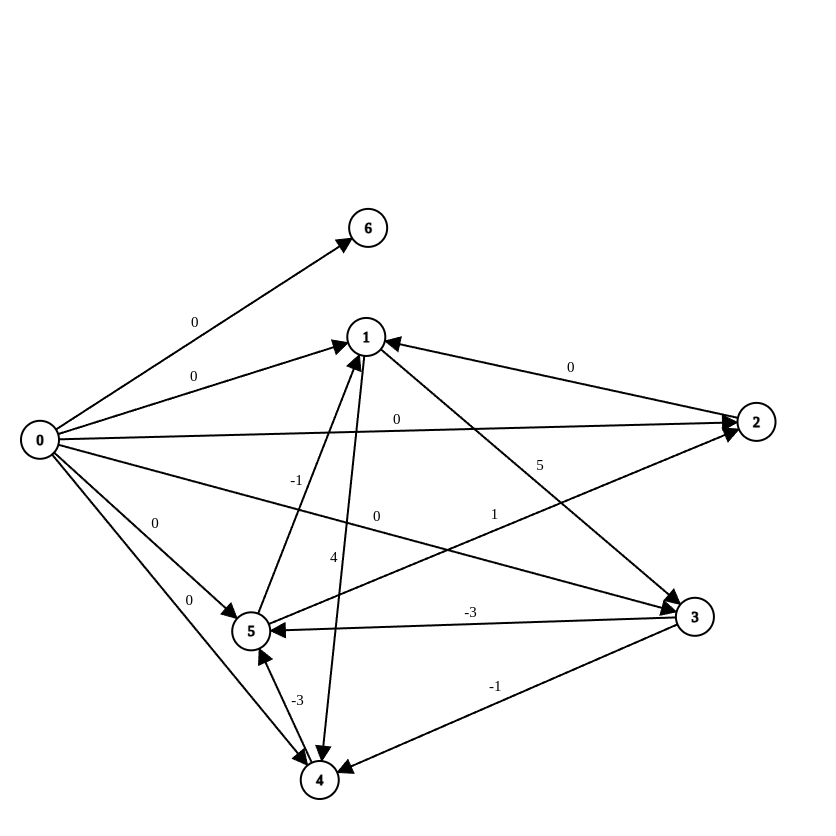

The constraint graph corresponding to the system above. The value of $ \delta (v_0, v_i) is shown in each vertex $v_i$. A feasible solution to the system is $x = (-5, -3, 0, -1, -4)$.

The following theorem shows that we can find a solution to a system of difference constraints by finding shortest-path weights in the corresponding constraint graph.

### Theorem

Given a system $ Ax \leq b $ of difference constraints, let $ G = (V, E) $ be the corresponding constraint graph. If $ G $ contains no negative-weight cycles, then

$x = (\delta(v_0, v_1), \delta(v_0, v_2), \delta(v_0, v_3), ..., \delta(v_0, v_n))$

is a feasible solution for the system. If G contains a negative-weight cycle, then there is no feasible solution for the system.

### Proof

We first show that if the constraint graph contains no negative-weight cycles, then equation (24.11) gives a feasible solution. Consider any edge $(v_i, v_j) ∈ E$. By the triangle inequality, $\delta(v_0, v_j) \leq \delta(v_0, v_i) + w(v_i, v_j)$ or, equivalently, $\delta(v_0, v_j) - \delta(v_0, v_i) \leq w(v_i, v_j)$. Thus, letting $x_i = \delta(v_0, v_i)$ and $x_j = \delta(v_0, v_j)$ satisfies the difference constraint $x_j - x_i \leq w(v_i, v_j)$ that corresponds to edge $(vi, vj)$.

Now we show that if the constraint graph contains a negative-weight cycle, then the system of difference constraints has no feasible solution. Without loss of generality, let the negative-weight cycle be $c = 〈v_1, v_2,..., v_k〉$, where $v_1 = v_k$. (The vertex $v_0$ cannot be on cycle $c$, because it has no entering edges.) Cycle $c$ corresponds to the following difference constraints:

$x2 - x1 \qquad \qquad \leq \qquad  w(v1, v2)$,



$x_3 - x_2 \qquad \qquad   \vdots   \qquad  w(v_2, v_3)$,


$\qquad \qquad \qquad \quad \leq \qquad \qquad  \qquad$

$xk - xk-1 \qquad \leq \qquad  w(vk-1, vk)$,

$x1 - xk \qquad \qquad \leq \qquad  w(vk, v1)$
.

Suppose that there is a solution for $x$ satisfying each of these $k$ inequalities. This solution must also satisfy the inequality that results when we sum the $k$ inequalities together. If we sum the left-hand sides, each unknown $x_i$ is added in once and subtracted out once, so that the left-hand side of the sum is 0. The right-hand side sums to $w(c)$, and thus we obtain $0 \leq w(c) $. But since $c$ is a negative-weight cycle, $w(c) < 0$, and we obtain the contradiction that $0 \leq w(c) < 0$.

## Solving systems of difference constraints
Theorem above tells us that we can use the Bellman-Ford algorithm to solve a system of difference constraints. Because there are edges from the source vertex $v_0$ to all other vertices in the constraint graph, any negative-weight cycle in the constraint graph is reachable from v_0. If the Bellman-Ford algorithm returns TRUE, then the shortest-path weights give a feasible solution to the system. In Figure above, for example, the shortest-path weights provide the feasible solution $ x = (-5, -3, 0, -1, -4) $ , and by Lemma $ x = (d - 5, d - 3, d, d - 1, d - 4) $ is also a feasible solution for any constant $ d $. If the Bellman-Ford algorithm returns FALSE, there is no feasible solution to the system of difference constraints.

A system of difference constraints with $ m $ constraints on n unknowns produces a graph with $n+1$ vertices and $n+m$ edges.

Thus, using the Bellman-Ford algorithm, we can solve the system in $O((n + 1)(n + m)) = O(n^2 + nm)$ time.


In [22]:
g2 = Graph(6)
g2.addEdge(0, 1, 0)
g2.addEdge(0, 2, 0)
g2.addEdge(0, 3, 0)
g2.addEdge(0, 4, 0)
g2.addEdge(0, 5, 0)

g2.addEdge(3, 4, -1)
g2.addEdge(3, 5, -3)
g2.addEdge(4, 5, -3)
g2.addEdge(5, 2, 1)
g2.addEdge(5, 1, -1)
g2.addEdge(1, 4, 4)
g2.addEdge(1, 3, 5)
g2.addEdge(2, 1, 0)

# function call
g2.BellmanFord(0)

Vertex Distance from Source
0		0
1		-5
2		-3
3		0
4		-1
5		-4


# Johnson’s algorithm for All-pairs shortest paths

The problem is to find the shortest paths between every pair of vertices in a given weighted directed Graph and weights may be negative. We have discussed Floyd Warshall Algorithm for this problem.  The time complexity of the Floyd Warshall Algorithm is Θ(V3). 

Using Johnson’s algorithm, we can find all pair shortest paths in O(V2log V + VE) time. Johnson’s algorithm uses both Dijkstra and Bellman-Ford as subroutines. If we apply Dijkstra’s Single Source shortest path algorithm for every vertex, considering every vertex as the source, we can find all pair shortest paths in O(V*VLogV) time. 

So using Dijkstra’s single-source shortest path seems to be a better option than Floyd Warshall’s Algorithm , but the problem with Dijkstra’s algorithm is, that it doesn’t work for negative weight edge. The idea of Johnson’s algorithm is to re-weight all edges and make them all positive, then apply Dijkstra’s algorithm for every vertex. 



One may think of a simple approach of finding the minimum weight edge and adding this weight to all edges. Unfortunately, this doesn’t work as there may be a different number of edges in different paths (See this for an example). If there are multiple paths from a vertex u to v, then all paths must be increased by the same amount, so that the shortest path remains the shortest in the transformed graph. The idea of Johnson’s algorithm is to assign a weight to every vertex. Let the weight assigned to vertex u be h[u]. 

We reweight edges using vertex weights. For example, for an edge (u, v) of weight w(u, v), the new weight becomes w(u, v) + h[u] – h[v]. The great thing about this reweighting is, that all set of paths between any two vertices is increased by the same amount and all negative weights become non-negative. Consider any path between two vertices s and t, the weight of every path is increased by h[s] – h[t], and all h[] values of vertices on the path from s to t cancel each other. 

How do we calculate h[] values? 

Bellman-Ford algorithm is used for this purpose. Following is the complete algorithm. A new vertex is added to the graph and connected to all existing vertices. The shortest distance values from the new vertex to all existing vertices are h[] values. 

### Algorithm: 

Let the given graph be G. Add a new vertex s to the graph, add edges from the new vertex to all vertices of G. Let the modified graph be G’. 
Run the Bellman-Ford algorithm on G’ with s as the source. Let the distances calculated by Bellman-Ford be h[0], h[1], .. h[V-1]. If we find a negative weight cycle, then return. Note that the negative weight cycle cannot be created by new vertex s as there is no edge to s. All edges are from s. 
Reweight the edges of the original graph. For each edge (u, v), assign the new weight as “original weight + h[u] – h[v]”. 
Remove the added vertex s and run Dijkstra’s algorithm for every vertex. 

### How does the transformation ensure nonnegative weight edges? 

The following property is always true about h[] values as they are the shortest distances.

   h[v] <= h[u] + w(u, v) 
The property simply means that the shortest distance from s to v must be smaller than or equal to the shortest distance from s to u plus the weight of the edge (u, v). The new weights are w(u, v) + h[u] – h[v]. The value of the new weights must be greater than or equal to zero because of the inequality “h[v] <= h[u] + w(u, v)”. 

In [23]:
import sys

# Number of vertices in the graph
V = 4

# A utility function to find the vertex with minimum distance value, from
# the set of vertices not yet included in shortest path tree


def minDistance(dist, sptSet):
	# Initialize min value
	min_val = sys.maxsize
	min_index = 0

	for v in range(V):
		if sptSet[v] == False and dist[v] <= min_val:
			min_val = dist[v]
			min_index = v

	return min_index

# A utility function to print the constructed distance array


def printSolution(dist):
	print("Following matrix shows the shortest distances between every pair of vertices")
	for i in range(V):
		for j in range(V):
			if dist[i][j] == sys.maxsize:
				print("{:>7s}".format("INF"), end="")
			else:
				print("{:>7d}".format(dist[i][j]), end="")
		print()

# Solves the all-pairs shortest path problem using Johnson's algorithm


def floydWarshall(graph):
	dist = [[0 for x in range(V)] for y in range(V)]

	# Initialize the solution matrix same as input graph matrix. Or
	# we can say the initial values of shortest distances are based
	# on shortest paths considering no intermediate vertex.
	for i in range(V):
		for j in range(V):
			dist[i][j] = graph[i][j]

	# Add all vertices one by one to the set of intermediate vertices.
	# Before start of a iteration, we have shortest distances between all
	# pairs of vertices such that the shortest distances consider only the
	# vertices in set {0, 1, 2, .. k-1} as intermediate vertices.
	# After the end of a iteration, vertex no. k is added to the set of
	# intermediate vertices and the set becomes {0, 1, 2, .. k}
	for k in range(V):
		# Pick all vertices as source one by one
		for i in range(V):
			# Pick all vertices as destination for the
			# above picked source
			for j in range(V):
				# If vertex k is on the shortest path from
				# i to j, then update the value of dist[i][j]
				if dist[i][k] + dist[k][j] < dist[i][j]:
					dist[i][j] = dist[i][k] + dist[k][j]

	# Print the shortest distance matrix
	printSolution(dist)


# driver program to test above function
if __name__ == "__main__":

	''' Let us create the following weighted graph
			10
   (0)------->(3)
    |		  /|\
  5 |		   |
	|		   | 1
   \|/		   |
   (1)------->(2)
	      3		    '''

	graph = [[0, 5, sys.maxsize, 10],
			[sys.maxsize, 0, 3, sys.maxsize],
			[sys.maxsize, sys.maxsize, 0, 1],
			[sys.maxsize, sys.maxsize, sys.maxsize, 0]
			]

	# Print the solution
	floydWarshall(graph)


Following matrix shows the shortest distances between every pair of vertices
      0      5      8      9
    INF      0      3      4
    INF    INF      0      1
    INF    INF    INF      0


### video steps for another example

In [24]:
from IPython.display import Video

Video("Johnsons.mp4")

Time Complexity: The main steps in the algorithm are Bellman-Ford Algorithm called once and Dijkstra called V times. Time complexity of Bellman Ford is O(VE) and time complexity of Dijkstra is O(VLogV). So overall time complexity is O(V2log V + VE). 

The time complexity of Johnson’s algorithm becomes the same as Floyd Warshall’s Algorithm

when the graph is complete (For a complete graph E = O(V2). But for sparse graphs, the algorithm performs much better than Floyd Warshall’s Algorithm

Auxiliary Space: O(V2)